In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import itertools

In [5]:
df_raw = pd.read_csv('myanimelist_recommender_ready_enriched.csv')


In [6]:
df_raw.head(2)

,mal_id,title,title_english,title_japanese,type,episodes,status,score,rank,popularity,...,url,aired_date,review_tags_count,Creative,MixedFeelings,Recommended,Funny,NotRecommended,Informative,Well-written
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,TV,26.0,Finished Airing,8.75,46.0,42,...,https://myanimelist.net/anime/1/Cowboy_Bebop,1998-04-03T00:00:00+00:00,"{'Recommended': 16, 'Mixed Feelings': 2, 'Not ...",0,2,16,0,2,0,0
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,Movie,1.0,Finished Airing,8.38,215.0,642,...,https://myanimelist.net/anime/5/Cowboy_Bebop__...,2001-09-01T00:00:00+00:00,"{'Recommended': 15, 'Mixed Feelings': 3, 'Not ...",0,3,15,1,2,0,0


In [4]:
df_raw.columns

Index(['mal_id', 'title', 'title_english', 'title_japanese', 'type',
       'episodes', 'status', 'score', 'rank', 'popularity', 'members',
       'favorites', 'synopsis', 'genres', 'themes', 'demographics', 'studios',
       'year', 'url', 'aired_date', 'review_tags_count', 'Creative',
       'MixedFeelings', 'Recommended', 'Funny', 'NotRecommended',
       'Informative', 'Well-written'],
      dtype='object')

Categorical:

 - Nominal:
   - title
   - title_english
   - title_japanese
   - type
   - status
   - url
   - review_tags_count
   
Numberical:

 - Discrete:
   - mal_id
   - episodes
   - popularity
   - members
   - favorites
   - Creative
   - MixedFeelings
   - Recommended
   - Funny
   - NotRecommended
   - Informative
   - Well-written

 - Continuous:
   - year
   - aired_date
   - score
   - rank


In [ ]:
categories = ['title', 'title_english', 'title_japanese', 'type', 'status', 'url', 'review_tags_count']
numeric = ['mal_id', 'episodes', 'score', 'rank', 'popularity', 'members', 'year', 'aired_date', 'Creative', 'MixedFeelings', 'Recommended', 'Funny', 'NotRecommended', 'Informative', 'Well-written']

Cột ko có ý nghĩa phân tích: 
 -  ['title', 'title_english', 'title_japanese', 'url', 'review_tags_count']
 -  ['mal_id', 'Creative',  'Funny', 'Informative', 'Well-written'] (subset của 'Recommended', 'NotRecommended', 'MixedFeelings')

In [12]:
categories = ['type', 'status']
numeric = ['episodes', 'score', 'rank', 'popularity', 'members', 'year', 'aired_date', 'MixedFeelings', 'Recommended', 'NotRecommended']

## Phân tích dữ liệu

### Categorical

In [15]:
def plot_categorical_distribution_grid(df_raw, columns, cols=2):
    rows = (len(columns) + cols - 1) // cols 
    fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 4 * rows))
    axes = axes.flatten()  # Flatten in case it's 2D

    for i, col in enumerate(columns):
        ax = axes[i]
        counts = df_raw[col].value_counts()
        bars = ax.bar(counts.index, counts.values)

        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height,
                    f'{int(height)}', ha='center', va='bottom', fontsize=10)
            
        ax.set_xlabel(col)
        ax.set_ylabel("Count")
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        ax.set_xticks(range(len(counts.index)))
        ax.set_xticklabels(counts.index)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


In [16]:
# Unique values
for col in categories:
    print(f"'{col}': {df_raw[col].unique()}")

'type': ['TV' 'Movie' 'OVA' 'TV Special' 'Special' 'ONA' 'Music' 'CM' 'PV' nan]
'status': ['Finished Airing' 'Currently Airing' 'Not yet aired']


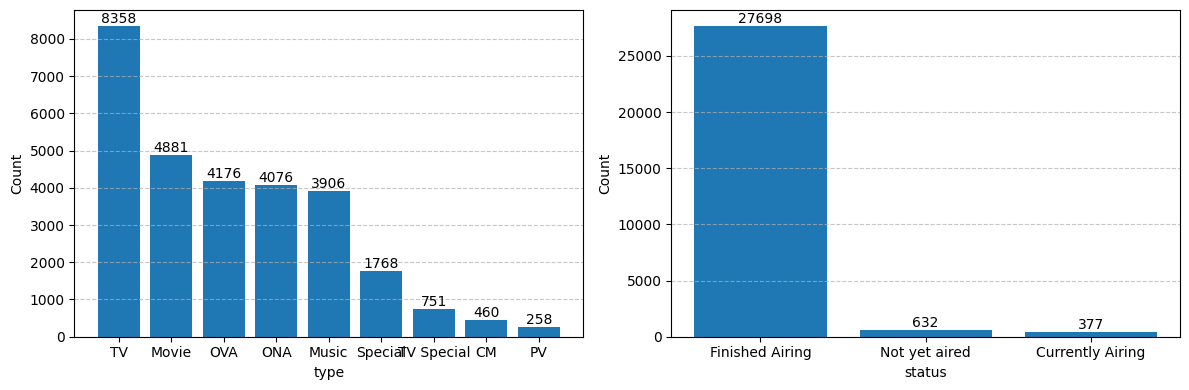

In [18]:
# Values distribution
plot_categorical_distribution_grid(df_raw, categories, cols=2)

### Numberical

In [22]:
df = df_raw.copy()

summary_stats = {
    "Thông số thống kê": [
        "Mean",
        "Min",
        "25th Percentile",
        "Median",
        "75th Percentile",
        "Max",
        "Mode",
        "Variance",
        "Standard Deviation",
        "Coefficient of Variation"
    ]
}

numeric_discrete = ['episodes', 'score', 'rank', 'popularity', 'members', 'MixedFeelings', 'Recommended', 'NotRecommended']

for col in numeric_discrete:
    data = df[col]
    mean_val = data.mean()
    std_val = data.std()
    mode_val = data.mode().iloc[0] if not data.mode().empty else np.nan
    variance_val = data.var()
    cv_val = std_val / mean_val if mean_val != 0 else np.nan

    summary_stats[col] = [
        mean_val,
        data.min(),
        data.quantile(0.25),
        data.median(),
        data.quantile(0.75),
        data.max(),
        mode_val,
        variance_val,
        std_val,
        cv_val
    ]

formatted_summary_df = summary_df.copy()

for col in formatted_summary_df.columns[1:]:  # Skip "Thông số thống kê"
    formatted_summary_df[col] = formatted_summary_df[col].apply(lambda x: f'{x:,.4f}' if isinstance(x, (int, float)) else x)

formatted_summary_df

,Thông số thống kê,episodes,score,rank,popularity,members,MixedFeelings,Recommended,NotRecommended
0,Mean,14.1471,6.3977,"10,865.1452","14,248.8755","38,427.4503",0.5961,1.8114,0.5022
1,Min,1.0000,1.8900,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000
2,25th Percentile,1.0000,5.7800,"5,430.2500","7,124.5000",235.0000,0.0000,0.0000,0.0000
3,Median,2.0000,6.3700,"10,862.5000","14,237.0000","1,085.0000",0.0000,0.0000,0.0000
4,75th Percentile,13.0000,7.0300,"16,301.7500","21,368.5000","9,154.0000",0.0000,1.0000,0.0000
5,Max,"3,057.0000",9.3000,"21,726.0000","28,493.0000","4,173,914.0000",13.0000,20.0000,17.0000
6,Mode,1.0000,6.3300,"6,407.0000","22,431.0000",80.0000,0.0000,0.0000,0.0000
7,Variance,"2,237.3319",0.7916,"39,398,226.3342","67,658,264.7048","27,500,470,047.7303",1.9443,15.9501,2.2640
8,Standard Deviation,47.3004,0.8897,"6,276.8006","8,225.4644","165,832.6568",1.3944,3.9938,1.5047
9,Coefficient of Variation,3.3435,0.1391,0.5777,0.5773,4.3155,2.3391,2.2048,2.9961


## Data visualization

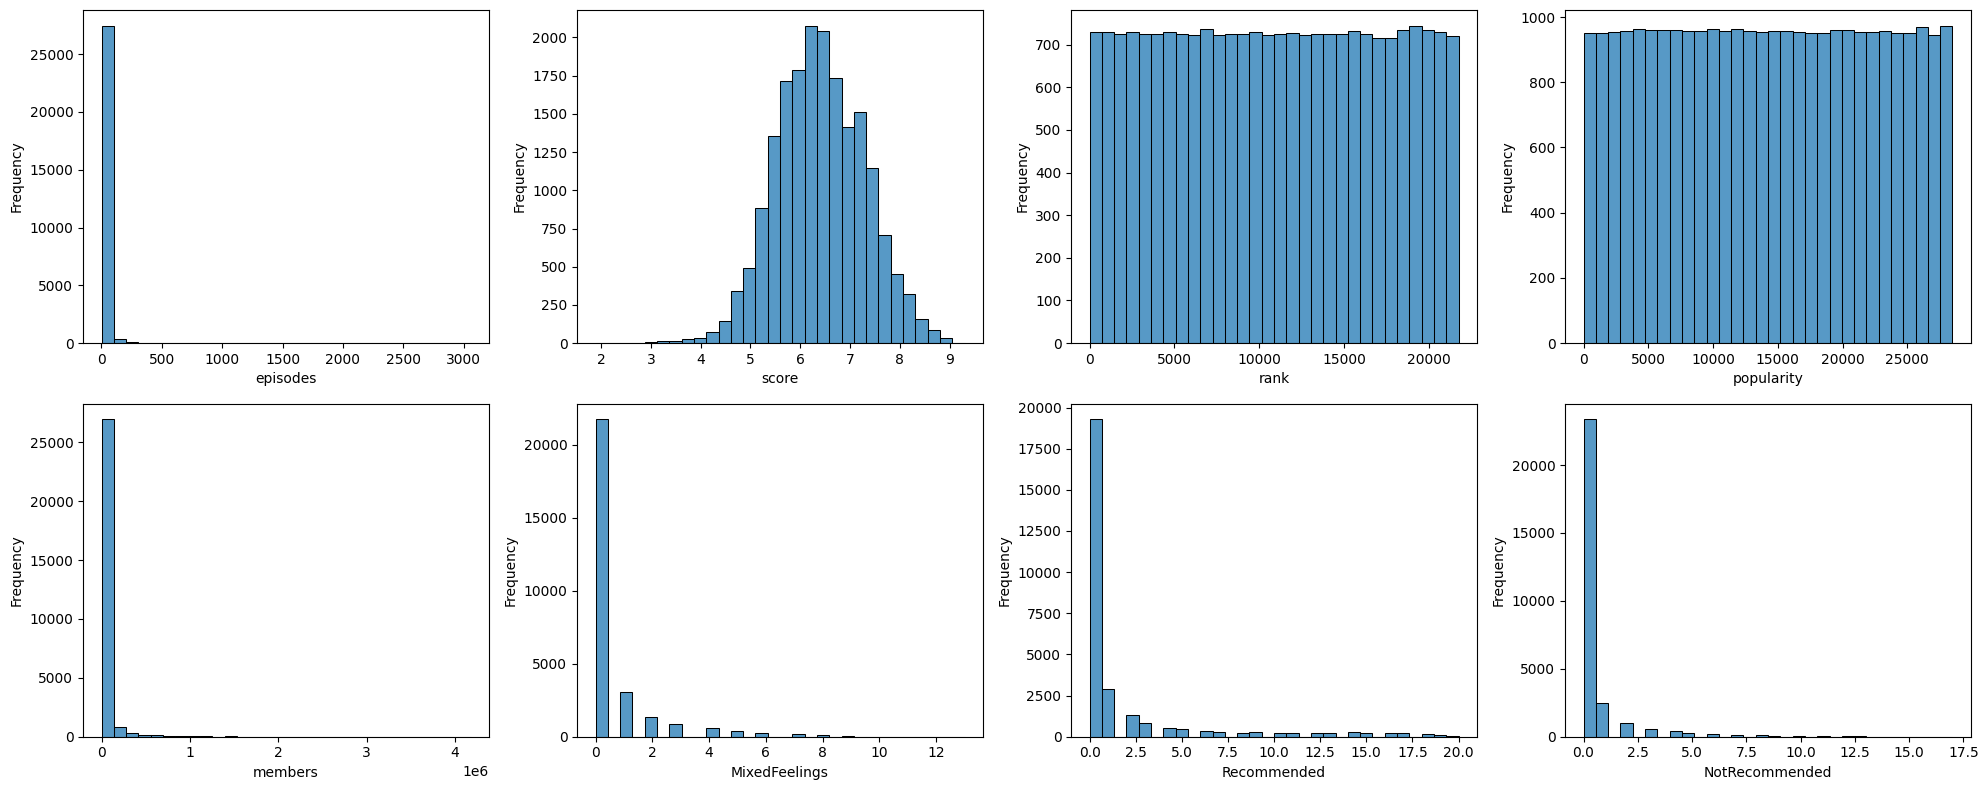

In [ ]:
def plot_histogram(df, columns):
    n = len(columns)
    rows = 2
    cols = math.ceil(n / rows)

    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
    axes = axes.flatten() 

    for i, col in enumerate(columns):
        ax = axes[i]
        sns.histplot(df[col], bins=30, ax=ax)
        ax.set_xlabel(col)
        ax.set_ylabel("Frequency")

    for j in range(len(columns), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_histogram(df, numeric_discrete)

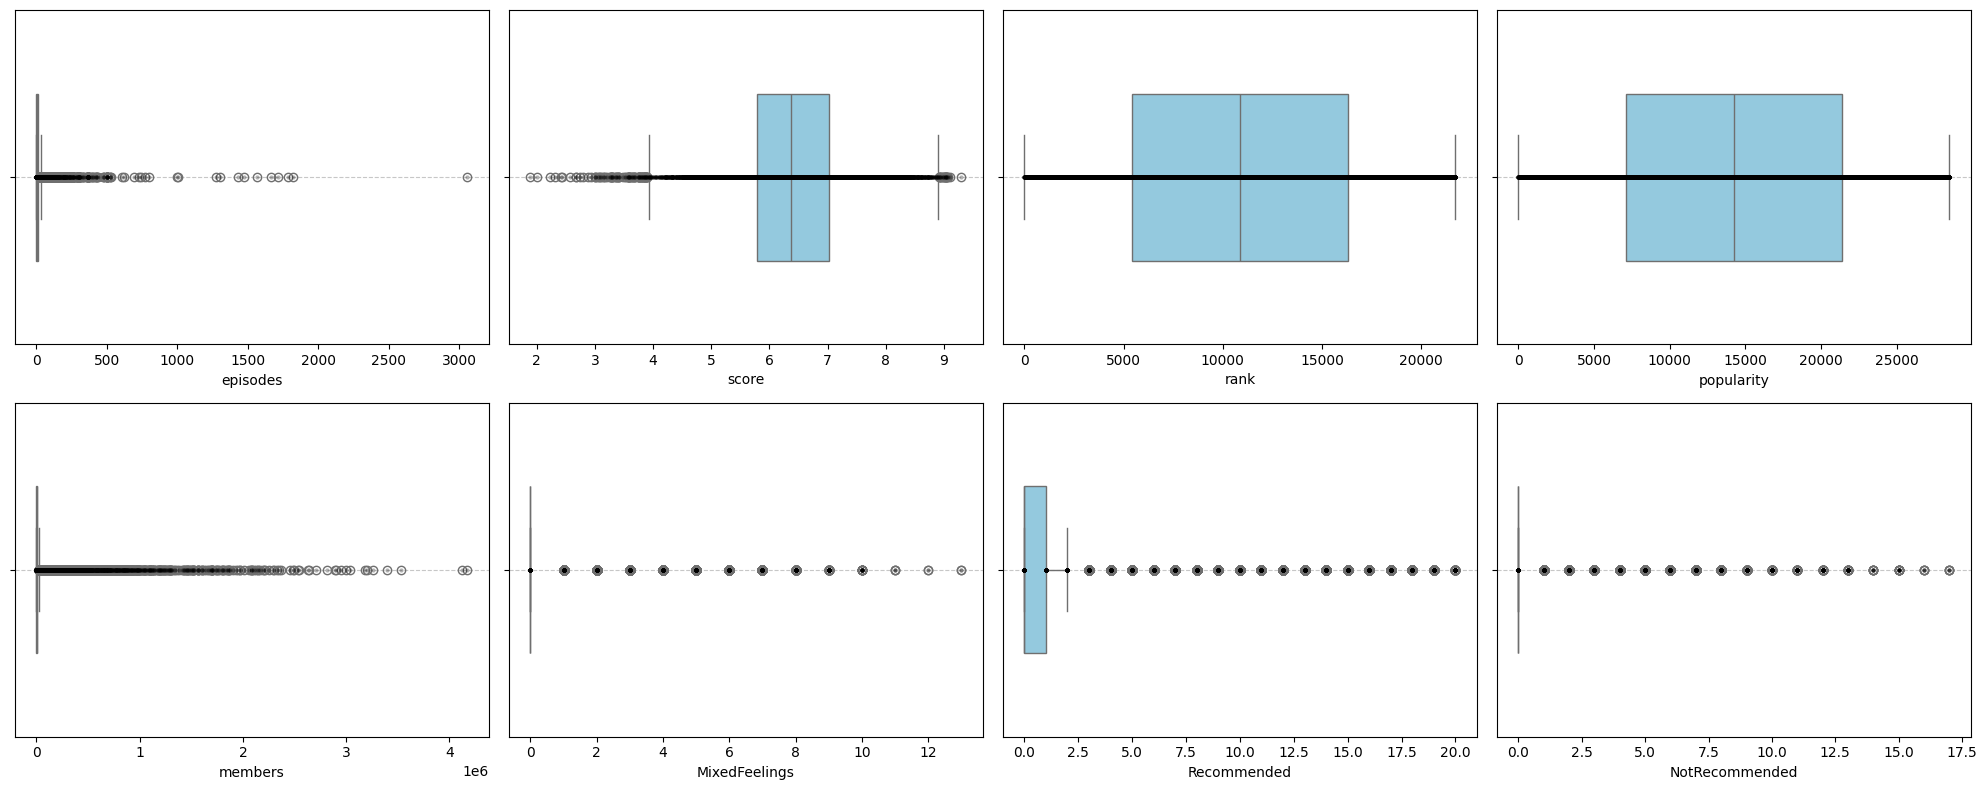

In [37]:
def plot_boxplots_with_centered_points(df_raw, columns):
    n = len(columns)
    rows = 2
    cols = math.ceil(n / rows)

    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
    axes = axes.flatten() 

    for i, col in enumerate(columns):
        sns.boxplot(x=df_raw[col], ax=axes[i], color='skyblue', width=0.5)
        sns.stripplot(x=df_raw[col], ax=axes[i], color='black', alpha=0.3, jitter=False, size=3)
        axes[i].set_xlabel(col)
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

plot_boxplots_with_centered_points(df_raw, numeric_discrete)


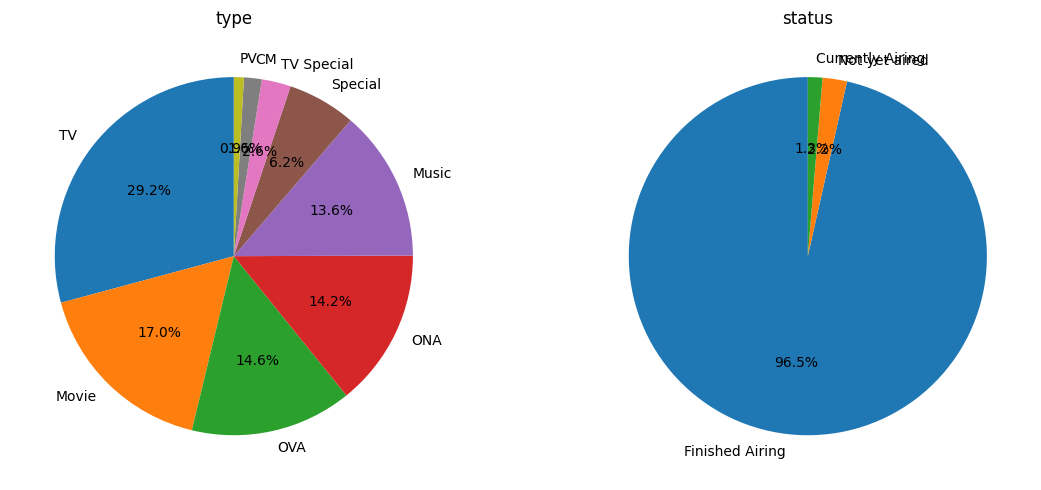

In [38]:
def plot_piecharts(df_raw, columns):
    fig, axes = plt.subplots(1, len(columns), figsize=(6 * len(columns), 5))

    for i, col in enumerate(columns):
        counts = df_raw[col].value_counts()
        axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
        axes[i].set_title(col)

    plt.tight_layout()
    plt.show()

plot_piecharts(df_raw, categories)